# Ch-5 Random Walk:

This is mostly an MRP over a MDP. 
MRPs are used when we want to do predictions. (no need for actions)

1. Here, all episodes start from the centre C. 
2. Move left or right witht the same probability.
3. Episodes terminate at extremeties.
4. When episode terminates on the rght, a reward of +1 is given, else 0.
5. The $V_\pi(s)$ of each state is the probability of terminating on the right if you start from that state.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import ipywidgets

In [2]:
VALUES=np.zeros(7)   #the state values are 0,1,2,3,4,5,6 with 0 as the leftmost end and 6 as the rightmost one.
VALUES[1:6]=0.5  
VALUES[6]=1

# set up true state values
TRUE_VALUE = np.zeros(7)
TRUE_VALUE[1:6] = np.arange(1, 6) / 6.0
TRUE_VALUE[6] = 1

#actions and their rewards
ACTION_L=0
ACTION_R=1

In [3]:
#BASIC TD ALGORITHM:

def TD(values, alpha, batch=False):
    state=3  #randomly initialising state
    trajectory=[state]
    rewards=[0]
    while True:
        old_state = state
        if np.random.binomial(1, 0.5) == ACTION_L:
            state -= 1
        else:
            state+=1
        reward=0
        trajectory.append(state)

        #TD update:
        if not batch:
            values[old_state]+=alpha*(reward+values[state]-values[old_state])
        if state==6 or state==0:
            break
        rewards.append(reward)
    return trajectory, rewards

In [4]:
# Example 6.2 left
def compute_state_value():
    episodes = [0, 1, 10, 100]
    current_values = np.copy(VALUES)
    plt.figure(1)
    for i in range(episodes[-1] + 1):
        if i in episodes:
            plt.plot(("A", "B", "C", "D", "E"), current_values[1:6], label=str(i) + ' episodes')
        TD(current_values, alpha=0.1)
    plt.plot(("A", "B", "C", "D", "E"), TRUE_VALUE[1:6], label='true values')
    plt.xlabel('State')
    plt.ylabel('Estimated Value')
    plt.legend()

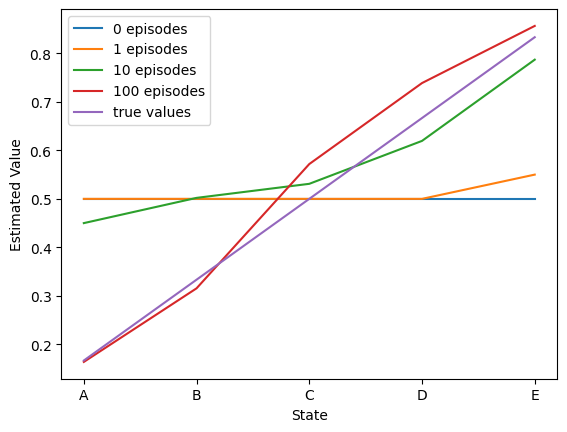

In [5]:
compute_state_value()

In [6]:
# Same thing implemented in monte carlo to see difference:
def MC(values, alpha, batch=False):
    state=3
    trajectory=[state]
    while True:
        if np.random.binomial(1,0.5)== ACTION_L: #taken binomial for equal distribution
            state-=1
        else:
            state+=1
        trajectory.append(state)
        if state == 6:
            returns = 1.0
            break
        elif state == 0:
            returns = 0.0
            break
    if not batch:  #notice how the update happens after each full episode!
        for state_, in trajectory:
            values[state_]+=alpha*(returns-values[state_])  #no bootstrap
    return trajectory, [returns]*len(trajectory-1)


# NOTE:
Could not make the graphs since I did not understand the matplotlib code!

In [7]:
def rms_error():
    # Same alpha value can appear in both arrays
    td_alphas = [0.15, 0.1, 0.05]
    mc_alphas = [0.01, 0.02, 0.03, 0.04]
    episodes = 100 + 1
    runs = 100
    for i, alphas in enumerate(td_alphas + mc_alphas):
        total_errors = np.zeros(episodes)
        if i < len(td_alphas):
            method = 'TD'
            linestyle = 'solid'
        else:
            method = 'MC'
            linestyle = 'dashdot'
        for r in tqdm(range(runs)):
            errors = []
            current_values = np.copy(VALUES)
            for i in range(0, episodes):
                errors.append(np.sqrt(np.sum(np.power(TRUE_VALUE - current_values, 2)) / 5.0))
                if method == 'TD':
                    TD(current_values, alpha=alphas)
                else:
                    MC(current_values, alpha=alphas)
            total_errors += np.asarray(errors)
        total_errors /= runs
        plt.plot(total_errors, linestyle=linestyle, label=method + ', $\\alpha$ = %.02f' % (alphas))
    plt.xlabel('Walks/Episodes')
    plt.ylabel('Empirical RMS error, averaged over states')
    plt.legend()

In [8]:
# rms_error()